# TSF-GRIP Task-2
# Md Saqulain
## Finding the number of clusters using Unsupervised Learning

### KMeans Clustering

Creating the model using KMeans clustering to calculate the number of clusters


In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the data
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
data = pd.DataFrame(iris.data,columns = iris.feature_names)

### Analyzing the data

In [4]:
# First 5 columns of the data
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Last 5 columns of the data
data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [6]:
# Checking the shape
data.shape

(150, 4)

In [7]:
# Checking the columns
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [8]:
# Info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# Checking the null values
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

### Preparing the data

In [11]:
x = data.iloc[:,:].values

# Analyzing the number of clusters
ssd=[] # Sum of Squared distance
from sklearn.cluster import KMeans
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    ssd.append(kmeans.inertia_)

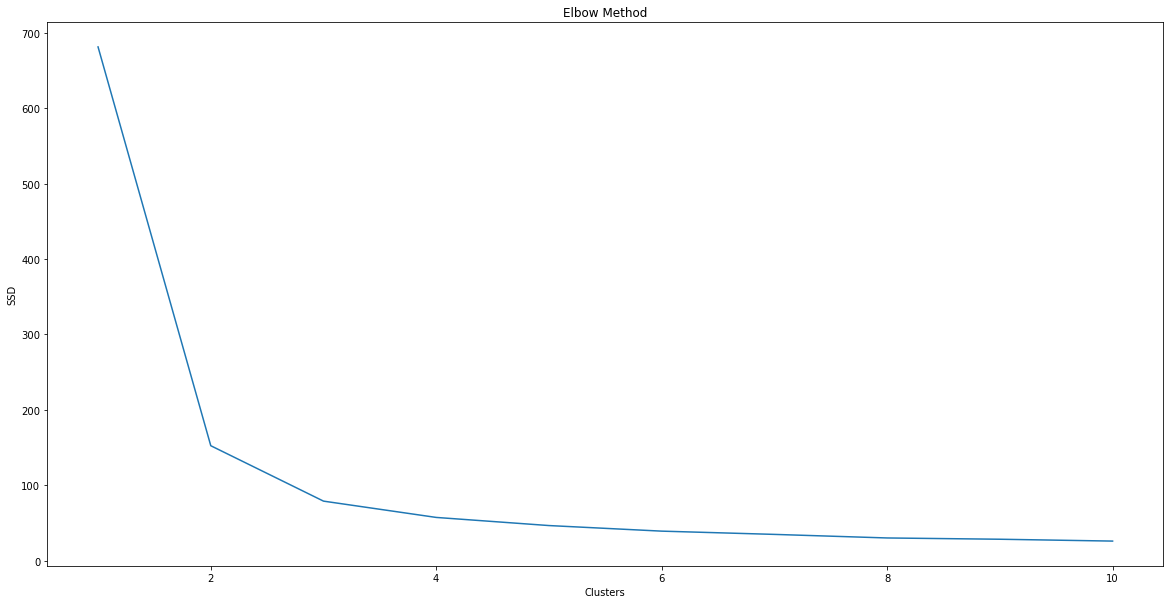

In [12]:
# Visualizing the number of clusters using the elbow method  
plt.figure(figsize=(20,10))
plt.plot(range(1,11),ssd)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('SSD')
plt.show()

In [13]:
# Applying the KMeans on the data
kmeans_cluster = KMeans(n_clusters=3,max_iter=300)
y_kmeans= kmeans_cluster.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### Visualizing the clusters and their centres

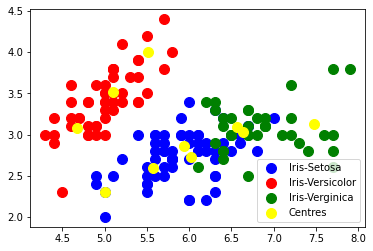

In [14]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],label = 'Iris-Setosa',s=100,c='blue')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],label = 'Iris-Versicolor',s=100,c='red')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],label='Iris-Verginica',s=100,c='green')

plt.legend()

